In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
df = pd.read_csv('Churn_Modelling.csv')

In [5]:
df.shape

(10000, 14)

In [6]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
df.duplicated().sum()

0

In [9]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [12]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [13]:
df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace = True)

In [15]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [21]:
df = pd.get_dummies(df, columns = ['Geography', 'Gender'], drop_first = True)

In [22]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [23]:
X = df.drop(columns = ['Exited'])
y = df['Exited']

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=  0.2, random_state=1)

## Scaling the values

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [26]:
X_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [29]:
import tensorflow
from tensorflow import keras 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [45]:
model  = Sequential()

model.add(Dense(11,activation = 'relu', input_dim = 11))
model.add(Dense(11,activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [46]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 11)                132       
                                                                 
 dense_3 (Dense)             (None, 11)                132       
                                                                 
 dense_4 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276
Trainable params: 276
Non-trainable params: 0
_________________________________________________________________


In [47]:
model.compile(loss = 'binary_crossentropy', optimizer = 'Adam', metrics=['accuracy'])

In [64]:
history = model.fit(X_train_scaled, y_train, epochs = 30, validation_split=0.2)

Epoch 1/30
200/200 [==============================] - 1s 4ms/step - loss: 0.3408 - accuracy: 0.8622 - val_loss: 0.3493 - val_accuracy: 0.8569
Epoch 2/30
200/200 [==============================] - 1s 3ms/step - loss: 0.3407 - accuracy: 0.8612 - val_loss: 0.3485 - val_accuracy: 0.8556
Epoch 3/30
200/200 [==============================] - 1s 3ms/step - loss: 0.3393 - accuracy: 0.8627 - val_loss: 0.3504 - val_accuracy: 0.8525
Epoch 4/30
200/200 [==============================] - 1s 4ms/step - loss: 0.3389 - accuracy: 0.8631 - val_loss: 0.3494 - val_accuracy: 0.8575
Epoch 5/30
200/200 [==============================] - 1s 4ms/step - loss: 0.3382 - accuracy: 0.8625 - val_loss: 0.3481 - val_accuracy: 0.8587
Epoch 6/30
200/200 [==============================] - 1s 4ms/step - loss: 0.3378 - accuracy: 0.8623 - val_loss: 0.3471 - val_accuracy: 0.8569
Epoch 7/30
200/200 [==============================] - 1s 3ms/step - loss: 0.3372 - accuracy: 0.8620 - val_loss: 0.3483 - val_accuracy: 0.8587
Epoch 

In [65]:
model.layers[1].get_weights()

[array([[ 6.12040907e-02, -1.78232157e+00, -4.77493644e-01,
         -3.98094416e-01, -1.09652899e-01, -4.55401301e-01,
         -6.78271472e-01, -4.46344554e-01, -5.28214455e-01,
         -3.08742017e-01,  9.75542426e-01],
        [-2.54205346e-01, -3.04067045e-01,  3.02829146e-01,
         -1.01337321e-01,  4.11525935e-01, -1.54697388e-01,
         -5.08601218e-02,  4.96585608e-01,  3.15894574e-01,
         -4.65739220e-01,  4.06492710e-01],
        [-2.88566440e-01,  1.53392658e-01,  4.11638558e-01,
         -2.99019784e-01, -1.02274299e-01,  1.33196712e-01,
          1.81510642e-01,  2.17286929e-01,  4.13415991e-02,
          1.42619565e-01, -1.35685563e-01],
        [ 6.37684949e-03, -2.11900949e-01, -3.71267229e-01,
          4.77214187e-01,  2.14408949e-01, -4.80427295e-01,
         -7.09770739e-01,  6.07714593e-01, -2.03269526e-01,
          2.98173875e-01, -1.92131832e-01],
        [ 1.82627559e-01,  7.21434534e-01,  1.20284863e-01,
         -1.23631395e-01,  5.33497818e-02, -

In [66]:
y_log = model.predict(X_test_scaled)

63/63 [==============================] - 0s 1ms/step


In [67]:
y_pred = np.where(y_log > 0.5, 1, 0)

In [68]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8635

In [69]:
import matplotlib.pyplot as plt


In [70]:
history.history

{'loss': [0.3407727777957916,
  0.3407098650932312,
  0.3392956852912903,
  0.33888939023017883,
  0.3382420241832733,
  0.33783063292503357,
  0.3371508717536926,
  0.33685821294784546,
  0.3360888361930847,
  0.33568060398101807,
  0.33546921610832214,
  0.3346586227416992,
  0.3342619836330414,
  0.3334752023220062,
  0.33287879824638367,
  0.33278071880340576,
  0.3322004973888397,
  0.33200082182884216,
  0.3312895894050598,
  0.330992192029953,
  0.33044567704200745,
  0.33041465282440186,
  0.33015280961990356,
  0.3300560414791107,
  0.32918184995651245,
  0.3287426829338074,
  0.32871630787849426,
  0.3275965452194214,
  0.32782524824142456,
  0.3280234932899475],
 'accuracy': [0.8621875047683716,
  0.8612499833106995,
  0.8626562356948853,
  0.8631250262260437,
  0.862500011920929,
  0.8623437285423279,
  0.8620312213897705,
  0.8639062643051147,
  0.8629687428474426,
  0.8629687428474426,
  0.8637499809265137,
  0.8634374737739563,
  0.86328125,
  0.864062488079071,
  0.8642

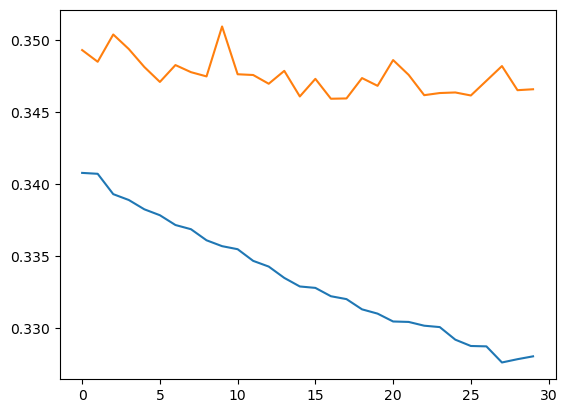

In [71]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

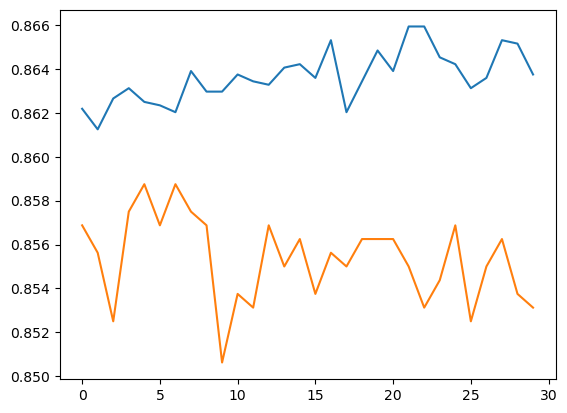

In [72]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])